In [2]:
import numpy as np

In [3]:
import cv2
image=cv2.imread("road.jpg")

#cv2.imshow("result",image)
#cv2.waitKey(0)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.imshow(image)
plt.show()

<Figure size 1000x700 with 1 Axes>

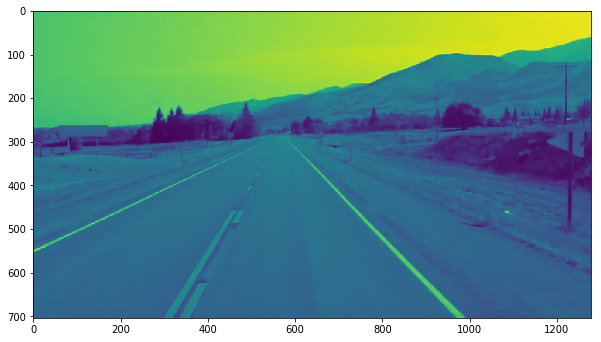

In [4]:
gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
#cv2.imshow("result",gray)

#cv2.waitKey(0)
plt.figure(figsize=(10,10))
plt.imshow(gray)
plt.show()

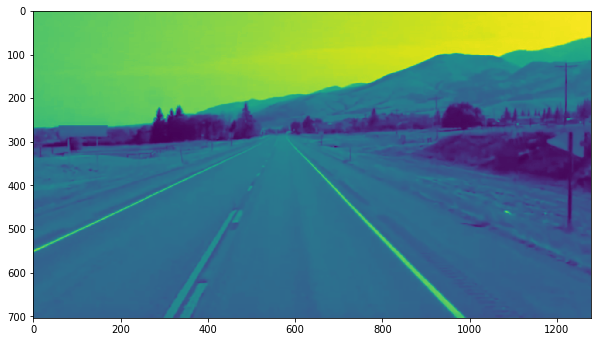

In [5]:
#reduciing the noise
blur=cv2.GaussianBlur(gray,(5,5),0)
plt.figure(figsize=(10,10))
plt.imshow(blur)
plt.show()

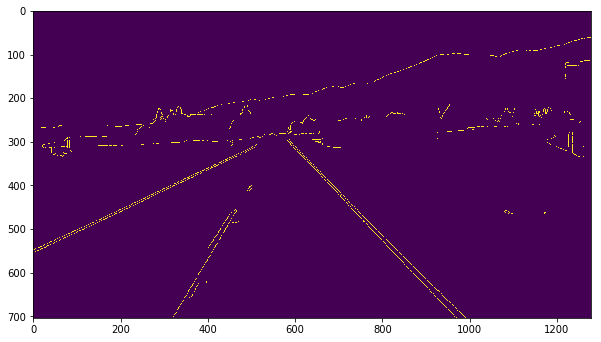

In [6]:
canny=cv2.Canny(blur,50,150)
plt.figure(figsize = (10,10))
plt.imshow(canny)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


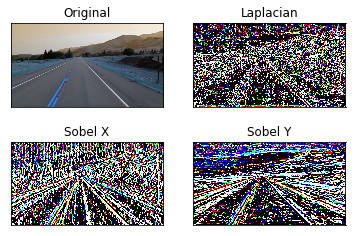

In [7]:
img=np.copy(image)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def canny(image):
	gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
	blur=cv2.GaussianBlur(gray,(5,5),0) #reduce noise
	canny = cv2.Canny(blur,50,150)
	return canny



def region_of_intrest(image):
    height=image.shape[0]
    poly=np.array([
        [(200,height),(1100,height),(550,250)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, poly,255)
    #cv2.polylines(image, np.int32([poly]), 1, (255,255,255))
    return mask

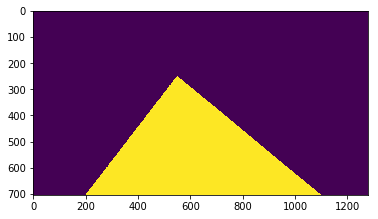

<Figure size 720x720 with 0 Axes>

In [9]:
lane_image=np.copy(image)
canny=canny(lane_image)
plt.imshow(region_of_intrest(canny))
plt.figure(figsize = (10,10))
plt.show()


In [10]:
def region_of_intrest_masked(image):
    height=image.shape[0]
    poly=np.array([
        [(200,height),(1100,height),(550,250)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, poly,255)
    masked_image=cv2.bitwise_and(image,mask)
    #cv2.polylines(image, np.int32([poly]), 1, (255,255,255))
    return masked_image

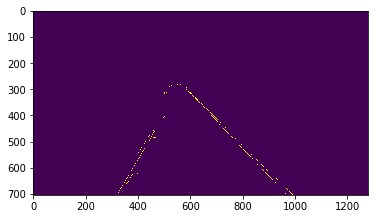

<Figure size 720x216 with 0 Axes>

In [11]:
cropped_image=region_of_intrest_masked(canny)
plt.imshow(cropped_image)
plt.figure(figsize = (10,3))
plt.show()

#comuted the lanes

[[704 418 927 641]]
[[704 426 791 516]]
[[320 703 445 494]]
[[585 301 663 381]]
[[630 341 670 383]]
[[794 520 861 591]]
[[659 371 704 416]]
[[870 599 939 672]]
[[767 493 807 534]]
[[423 509 454 461]]
[[940 653 991 702]]
[[824 551 879 609]]
[[676 389 754 467]]


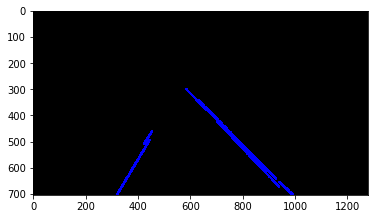

<Figure size 720x216 with 0 Axes>

In [12]:
def display_lines(image,lines):
    line_image=np.zeros_like(image)
    if lines is not None:
        for line in lines:
            print(line)
            x1,y1,x2,y2=line.reshape(4)
            cv2.line(line_image,(x1,y1),(x2,y2),(0,0,255),10)#(R,G,B) we are giving blue=255,10 is thickness
            
    return line_image       
             
                

lines=cv2.HoughLinesP(cropped_image,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
line_image=display_lines(lane_image,lines)
plt.imshow(line_image)
plt.figure(figsize = (10,3))
plt.show()


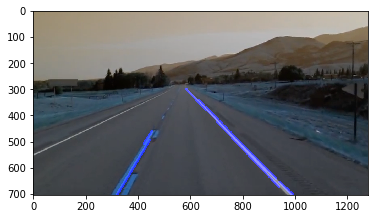

In [13]:
#adding blue lines to original
combo_image=cv2.addWeighted(lane_image,0.8,line_image,1,1)
plt.imshow(combo_image)
#plt.figure(figsize = (10,7))
plt.show()

lines are not single making them single

[   1. -286.] 

[   1.03448276 -302.27586207] 

[  -1.672 1238.04 ] 

[   1.02564103 -299.        ] 

[   1.05 -320.5 ] 

[   1.05970149 -321.40298507] 

[   1. -288.] 

[   1.05797101 -321.43478261] 

[   1.025 -293.175] 

[  -1.5483871  1163.96774194] 

[   0.96078431 -250.1372549 ] 

[   1.05454545 -317.94545455] 

[   1. -287.] 

[(-1.671999999999997, 1238.0399999999988), (-1.5483870967741828, 1163.967741935479)]
[(1.000000000000001, -286.000000000001), (1.0344827586206888, -302.27586206896507), (1.0256410256410238, -298.9999999999985), (1.0500000000000018, -320.50000000000125), (1.0597014925373138, -321.4029850746275), (1.000000000000001, -288.0000000000009), (1.0579710144927545, -321.43478260869665), (1.025000000000002, -293.17500000000166), (0.9607843137254858, -250.1372549019566), (1.054545454545454, -317.9454545454543), (0.9999999999999982, -286.99999999999886)]
left averge [  -1.61019355 1201.00387097]
right average [   1.0243751  -298.80648538]
[308 704 483 422]
[978 704 703

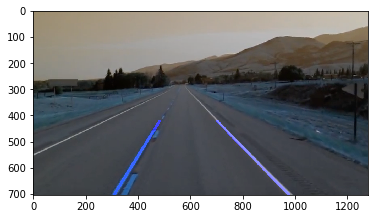

In [14]:
def make_cordinates(image,line_parameters):
    slope,intercept=line_parameters[0],line_parameters[1]
    y1=image.shape[0]
    y2=int(y1*3/5)
    x1=int((y1-intercept)/(slope)) #y=mx+c  x=y-c/m
    x2=int((y2-intercept)/(slope))
    return np.array([x1,y1,x2,y2])

    
    



def average_slope_intercept(image,lines):
    left_fit=[]
    right_fit=[]
    for line in lines:
        x1,y1,x2,y2=line.reshape(4)
        parameters=np.polyfit((x1,x2),(y1,y2),1) #see x-cordinate and then y-cordinates not x1,y1
        print(parameters, "\n")
        slope,intercept=parameters[0],parameters[1]
        if slope<0: #from above diagram slope negative for left line
            left_fit.append((slope,intercept))
        else:
            right_fit.append((slope,intercept))
            
    print(left_fit)
    print(right_fit)
    left_fit_average=np.average(left_fit,axis=0)
    right_fit_average=np.average(right_fit,axis=0)
    print("left averge",left_fit_average)
    print("right average",right_fit_average)
    left_line=make_cordinates(image,left_fit_average)
    right_line=make_cordinates(image,right_fit_average)
    return np.array([left_line,right_line])
    
    
    


averaged_lines=average_slope_intercept(lane_image,lines)
line_image=display_lines(lane_image,averaged_lines)

combo_image=cv2.addWeighted(lane_image,0.8,line_image,1,1)
plt.imshow(line_image)
plt.imshow(combo_image)
plt.show()

#cv2.imshow("result",combo_image)
#cv2.waitKey(0)

In [17]:
cap=cv2.VideoCapture("test2.mp4")
while(cap.isOpened()):
    _,frame=cap.read()
    canny_image=canny(frame)
    cropped_image=region_of_intrest_masked(canny_image)
    lines=cv2.HoughLinesP(cropped_image,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
    averaged_lines=average_slope_intercept(frame,lines)
    line_image=display_lines(lane_image,averaged_lines)

    combo_image=cv2.addWeighted(frame,0.8,line_image,1,1)
    cv2.imshow("result",combo_image)
    if cv2.waitKey(1)==ord('q'):
        break

        
cap.release()
cv2.destroyAllWindows()
    
    
    
    

TypeError: 'numpy.ndarray' object is not callable